## Data Loading 

In [1]:
import pandas as pd

In [2]:
dataset_path='working_file.csv'
df1 = pd.read_csv(dataset_path)

In [3]:
df1.head()

,text,label
0,phones modern humans today are always on thei...,0
1,this essay will explain if drivers should or s...,0
2,driving while the use of cellular devices tod...,0
3,d are likelphones and driving drivers should ...,0
4,cell phone operation while driving the abilit...,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75115 entries, 0 to 75114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    75115 non-null  object
 1   label   75115 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


## Data Visualization

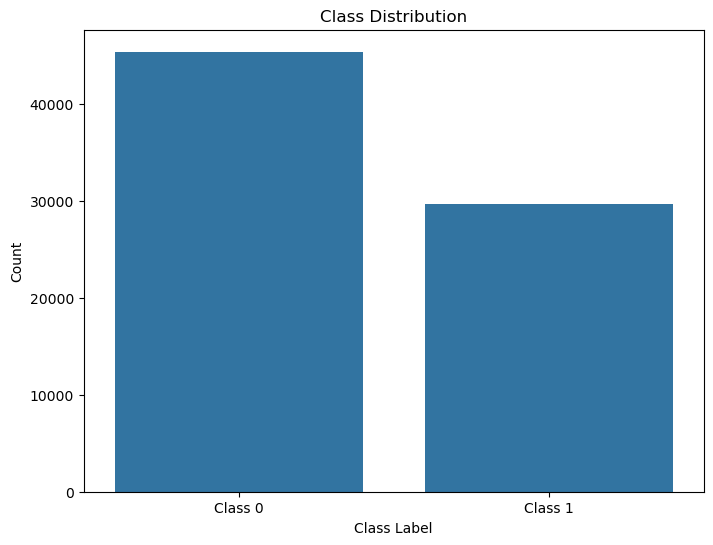

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame has a column named 'label' containing 0 and 1
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df1)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.show()

In [6]:
import re
import unicodedata

In [7]:
def preprocess_text(text):
    text = unicodedata.normalize('NFKC', text)
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = text.replace('\n', ' ')
    text = text.replace('&', 'and')
    
    return text

In [8]:
df1['text'] = df1['text'].apply(preprocess_text)

df1_updated = df1.head()
df1_updated

,text,label
0,phones modern humans today are always on thei...,0
1,this essay will explain if drivers should or s...,0
2,driving while the use of cellular devices tod...,0
3,d are likelphones and driving drivers should ...,0
4,cell phone operation while driving the abilit...,0


In [9]:
null_values = df1['text'].isnull().sum()
print(f"Number of null values in text: {null_values}")

duplicate_values = df1['text'].duplicated().sum()
print(f"Number of duplicate values in text: {duplicate_values}")

df1 = df1.dropna(subset=['text'])
df1 = df1.drop_duplicates(subset=['text'])

df1.head()

Number of null values in text: 0
Number of duplicate values in text: 9019


,text,label
0,phones modern humans today are always on thei...,0
1,this essay will explain if drivers should or s...,0
2,driving while the use of cellular devices tod...,0
3,d are likelphones and driving drivers should ...,0
4,cell phone operation while driving the abilit...,0


In [10]:
df1['text_length'] = df1['text'].apply(lambda x: len(x.split()))
df1[['text', 'text_length']].head()

,text,text_length
0,phones modern humans today are always on thei...,379
1,this essay will explain if drivers should or s...,366
2,driving while the use of cellular devices tod...,178
3,d are likelphones and driving drivers should ...,212
4,cell phone operation while driving the abilit...,332


In [11]:
df1.to_csv('text_length_output.csv',index=False)

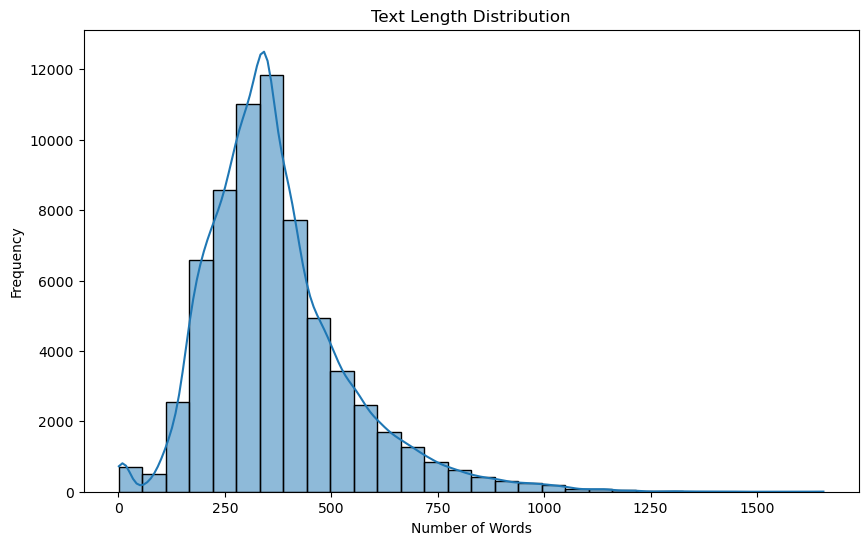

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df1['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# TFBert Model

#### Main model

In [13]:
# from transformers import BertTokenizer, TFBertModel
# from tensorflow.keras.optimizers import Adam

# # Enable mixed precision if supported
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

# # Configure GPU
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Restrict TensorFlow to only use the first GPU
#         tf.config.set_visible_devices(gpus[0], 'GPU')

#         # Restrict TensorFlow to only allocate a fraction of the GPU memory
#         tf.config.experimental.set_memory_growth(gpus[0], True)
#     except RuntimeError as e:
#         print(e)

# # Load pre-trained model and tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# base_model = TFBertModel.from_pretrained('bert-base-uncased', from_pt=True)  # Load from PyTorch weights

# # Freeze the layers to prevent fine-tuning
# base_model.trainable = False

# # Define the custom model
# class CustomModel(tf.keras.Model):
#     def _init_(self, base_model):
#         super(CustomModel, self)._init_()
#         self.base_model = base_model
#         self.dense1 = tf.keras.layers.Dense(256, activation='relu')
#         self.dense2 = tf.keras.layers.Dense(128, activation='relu')
#         self.dense3 = tf.keras.layers.Dense(64, activation='relu')
#         self.output_layer = tf.keras.layers.Dense(2, activation='softmax')  # Example for 2 classes

#     def call(self, inputs):
#         # Extract input ids and attention masks from the inputs dictionary
#         input_ids = inputs['input_ids']
#         attention_mask = inputs['attention_mask']
        
#         # Forward pass through the base model
#         base_outputs = self.base_model(input_ids, attention_mask=attention_mask, training=False)
        
#         # Get the last hidden state from the base model outputs
#         hidden_states = base_outputs.last_hidden_state
        
#         # Use the [CLS] token output
#         cls_output = hidden_states[:, 0, :]  # Extract the [CLS] token representation
        
#         # Pass through the dense layers
#         x = self.dense1(cls_output)
#         x = self.dense2(x)
#         x = self.dense3(x)
        
#         # Get final logits
#         logits = self.output_layer(x)
#         return logits

# # Instantiate the custom model
# custom_model = CustomModel(base_model)

# # Example text
# input_text = df1['text'].tolist()

# # Tokenize and encode the text
# inputs = tokenizer(input_text, return_tensors='tf', padding=True, truncation=True, max_length=256)

# # Convert the tokenizer output to a suitable input format for the model
# input_ids = inputs['input_ids']
# attention_mask = inputs['attention_mask']

# # Define the model inputs
# model_inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

# # Compile the model with the standard Adam optimizer
# optimizer = Adam(learning_rate=1e-5)
# custom_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Convert labels to TensorFlow tensor
# labels = tf.convert_to_tensor(df1['label'].values)  # Example: 0 for human-generated, 1 for machine-generated

# # Train the model with a smaller batch size if memory is an issue
# custom_model.fit(x={'input_ids': input_ids, 'attention_mask': attention_mask}, y=labels, batch_size=2, epochs=3, verbose=1)  # Adjust epochs and batch size as needed

#### Model saving

In [14]:
# # Save the model using TensorFlow SavedModel formata
# custom_model.save('C:/Users/chait/Project-1/bert_custom_model', save_format='tf')

#### Model Loading

In [27]:
# loaded_model = tf.keras.models.load_model('C:/Users/chait/Project-1/bert_custom_model', custom_objects={'TFBertModel': TFBertModel})

#### Prediction using the Loaded Model

In [28]:
# for key, value in loaded_model.signatures.items():
#     print(f"Signature: {key}")
#     print(value.structured_input_signature)


Signature: serving_default
((), {'attention_mask': TensorSpec(shape=(None, 256), dtype=tf.int32, name='attention_mask'), 'input_ids': TensorSpec(shape=(None, 256), dtype=tf.int32, name='input_ids')})


In [42]:
# def predict_new_text(text_list):
#     # Tokenize and encode the new text
#     new_inputs = tokenizer(text_list, return_tensors='tf', padding='max_length', truncation=True, max_length=256)
    
#     # Prepare input dictionary
#     model_inputs = {
#         'input_ids': new_inputs['input_ids'],
#         'attention_mask': new_inputs['attention_mask']
#     }
    
#     # Predict the class probabilities
#     predictions = loaded_model.predict(model_inputs)
    
#     # Convert probabilities to percentages
#     percentage_probabilities = predictions * 100
    
#     # Format the output
#     formatted_output = []
#     for i, probs in enumerate(percentage_probabilities):
#         formatted_str = "Text {}: \n".format(i + 1)
#         for j, prob in enumerate(probs):
#             formatted_str += "Class {}: {:.2f}%\n".format(j, prob)
#         formatted_output.append(formatted_str)
    
#     return formatted_output

# # Example new text to predict
# new_text = ['''HERMIA and Lysander were lovers; but
# Hermia’s father wished her to marry another man,
# named Demetrius.
# Now, in Athens, where they lived, there was a
# wicked law, by which any girl who refused to marry
# according to her father’s wishes, might be put to
# death. Hermia’s father was so angry with her for
# refusing to do as he wished, that he actually brought
# her before the Duke of Athens to ask that she might
# be killed, if she still refused to obey him. The Duke
# gave her four days to think about it, and, at the end
# of that time, if she still refused to marry Demetrius,
# she would have to die.
# Lysander of course was nearly mad with grief,
# and the best thing to do seemed to him for Hermia
# to run away to his aunt’s house at a place beyond the
# reach of that cruel law; and there he would come to
# her and marry her. But before she started, she told
# her friend, Helena, what she was going to do.
# Helena had been Demetrius’ sweetheart long
# before his marriage with Hermia had been thought
# of, and being very silly, like all jealous people, she 
# BEAUTIFUL STORIES FROM SHAKESPEARE
# 2
# could not see that it was not poor Hermia’s fault that
# Demetrius wished to marry her instead of his own
# lady, Helena. She knew that if she told Demetrius
# that Hermia was going, as she was, to the wood
# outside Athens, he would follow her, “and I can
# follow him, and at least I shall see him,” she said to
# herself. So she went to him, and betrayed her
# friend’s secret.
# Now this wood where
# Lysander was to
# meet Hermia,
# and where the
# other two had
# decided to follow them, was
# full of fairies,
# as most woods
# are, if one
# only had the
# eyes to see
# them, and in this wood
# on this night were the
# King and Queen of the
# fairies, Oberon and
# Titania. Now fairies
# are very wise people,
# but now and then
# they can be quite as
# foolish as mortal
# folk. Oberon and
# Titania, who might
# have been as happy
# TITANIA: THE QUEEN OF
# THE FAIRIES
# A MIDSUMMER NIGHT’S DREAM
#  3
# as the days were long, had thrown away all their joy
# in a foolish quarrel. They never met without saying
# disagreeable things to each other, and scolded each
# other so dreadfully that all their little fairy followers,
# for fear, would creep into acorn cups and hide them
# there.
# So, instead of keeping one happy Court and
# dancing all night through in the moonlight as is
# fairies’ use, the King with his attendants wandered
# through one part of the wood, while the Queen with
# hers kept state in another. And the cause of all this
# trouble was a little Indian boy whom Titania had
# taken to be one of her followers. Oberon wanted the
# child to follow him and be one of his fairy knights;
# but the Queen would not give him up.
# On this night, in a mossy moonlit glade, the
# King and Queen of the fairies met.
# “Ill met by moonlight, proud Titania,” said
# the King.
# “What! jealous, Oberon?” answered the
# Queen. “You spoil everything with your quarreling.
# Come, fairies, let us leave him. I am not friends with
# him now.”
# “It rests with you to make up the quarrel,”
# said the King.
# “Give me that little Indian boy, and I will
# again be your humble servant and suitor.”
# “Set your mind at rest,” said the Queen.
# “Your whole fairy kingdom buys not that boy from
# me. Come, fairies.” 
# BEAUTIFUL STORIES FROM SHAKESPEARE
# 4
# And she and her train rode off down the
# moonbeams.
#  “Well, go your
# ways,” said Oberon.
# “But I’ll be even with
# you before you leave
# this wood.”
# Then Oberon
# called his favorite
# fairy, Puck. Puck
# was the spirit of
# mischief. He used
# to slip into the
# dairies and take
# the cream away,
# and get into the
# churn so that the
# butter would not come, and turn the beer sour, and
# lead people out of their way on dark nights and then
# laugh at them, and tumble people’s stools from
# under them when they were going to sit down, and
# upset their hot ale over their chins when they were
# going to drink.
# “Now,” said Oberon to this little sprite,
# “fetch me the flower called Love-in-idleness. The
# juice of that little purple flower laid on the eyes of
# those who sleep will make them, when they wake, to
# love the first thing they see. I will put some of the
# juice of that flower on my Titania’s eyes, and when
# she wakes she will love the first thing she sees, were
# THE QUARREL
# A MIDSUMMER NIGHT’S DREAM
#  5
# it lion, bear, or wolf, or bull, or meddling monkey, or
# a busy ape.”''']
# # Predict the class probabilities for the new text
# formatted_probabilities = predict_new_text(new_text)
# print("\n".join(formatted_probabilities))


1/1 [==============================] - 0s 408ms/step
Text 1: 
Class 0: 98.94%
Class 1: 1.11%



# ROBERTa

#### Main model

In [17]:
# import tensorflow as tf
# from transformers import RobertaTokenizer, TFRobertaModel
# from tensorflow.keras.optimizers import Adam

# # Enable mixed precision if supported
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

# # Configure GPU
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Restrict TensorFlow to only use the first GPU
#         tf.config.set_visible_devices(gpus[0], 'GPU')

#         # Restrict TensorFlow to only allocate a fraction of the GPU memory
#         tf.config.experimental.set_memory_growth(gpus[0], True)
#     except RuntimeError as e:
#         print(e)

# # Load pre-trained model and tokenizer
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
# base_model = TFRobertaModel.from_pretrained('roberta-base', from_pt=True)  # Load from PyTorch weights

# # Freeze the layers to prevent fine-tuning
# base_model.trainable = False

# # Define the custom model
# class CustomModel(tf.keras.Model):
#     def __init__(self, base_model):
#         super(CustomModel, self).__init__()
#         self.base_model = base_model
#         self.dense1 = tf.keras.layers.Dense(256, activation='relu')
#         self.dense2 = tf.keras.layers.Dense(128, activation='relu')
#         self.dense3 = tf.keras.layers.Dense(64, activation='relu')
#         self.output_layer = tf.keras.layers.Dense(2, activation='softmax')  # Example for 2 classes

#     def call(self, inputs):
#         # Extract input ids and attention masks from the inputs dictionary
#         input_ids = inputs['input_ids']
#         attention_mask = inputs['attention_mask']
        
#         # Forward pass through the base model
#         base_outputs = self.base_model(input_ids, attention_mask=attention_mask, training=False)
        
#         # Get the last hidden state from the base model outputs
#         hidden_states = base_outputs.last_hidden_state
        
#         # Use the last token output
#         cls_output = hidden_states[:, -1, :]  # Extract the last token representation
        
#         # Pass through the dense layers
#         x = self.dense1(cls_output)
#         x = self.dense2(x)
#         x = self.dense3(x)
        
#         # Get final logits
#         logits = self.output_layer(x)
#         return logits

# # Instantiate the custom model
# custom_model = CustomModel(base_model)

# # Example text
# input_text = df1['text'].tolist()

# # Tokenize and encode the text
# inputs = tokenizer(input_text, return_tensors='tf', padding=True, truncation=True, max_length=256)

# # Convert the tokenizer output to a suitable input format for the model
# input_ids = inputs['input_ids']
# attention_mask = inputs['attention_mask']

# # Define the model inputs
# model_inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

# # Compile the model with the standard Adam optimizer
# optimizer = Adam(learning_rate=1e-5)
# custom_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Convert labels to TensorFlow tensor
# labels = tf.convert_to_tensor(df1['label'].values)  # Example: 0 for human-generated, 1 for machine-generated

# # Train the model with a smaller batch size if memory is an issue
# custom_model.fit(x=model_inputs, y=labels, batch_size=2, epochs=3, verbose=1)  # Adjust epochs and batch size as needed

#### Model saving

In [18]:
# # Save the model using TensorFlow SavedModel format
# custom_model.save('C:/Users/chait/Project-1/Roberta_custom_model', save_format='tf')

#### Loading the model

In [19]:
# import tensorflow as tf
# from transformers import RobertaTokenizer, TFRobertaModel

# # Load the saved model from the specified path
# loaded_model = tf.keras.models.load_model('C:/Users/chait/Project-1/Roberta_custom_model', custom_objects={'TFBertModel': TFBertModel})

# # Ensure that the tokenizer is the same as the one used during training
# tokenizer = RobertaTokenizer.from_pretrained('bert-base-uncased')

#### Using Loaded model for prediction

In [20]:
# def predict_new_text(text_list):
#     # Tokenize and encode the new text
#     new_inputs = tokenizer(text_list, return_tensors='tf', padding=True, truncation=True, max_length=256)
    
#     # Prepare input dictionary
#     model_inputs = {
#         'input_ids': new_inputs['input_ids'],
#         'attention_mask': new_inputs['attention_mask']
#     }
    
#     # Predict the class probabilities
#     predictions = loaded_model.predict(model_inputs)
    
#     # Get the predicted class
#     predicted_classes = tf.argmax(predictions, axis=1).numpy()
    
#     return predicted_classes

# # Example new text to predict
# new_text = [''' ''']

# # Predict the class for the new text
# predicted_classes = predict_new_text(new_text)
# print(predicted_classes)

# GPT-2

In [ ]:
import torch
import pandas as pd
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
from peft import LoraConfig, get_peft_model, TaskType
from sklearn.model_selection import train_test_split
from datasets import Dataset
    
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Train and test splitting the data
train_df,test_df=train_test_split(df1,test_size=0.2,random_state=42)
train_df=train_df.rename(columns={"labels":"label"})
test_df=test_df.rename(columns={"labels":"label"})

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token  # Set pad_token to eos_token if not defined

# Print padding token to verify
print(f"Padding Token: {tokenizer.pad_token}")

# Preprocessing function
def preprocess_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=256)

# # Apply preprocessing
# encoded_dataset = dataset.map(preprocess_function)
# encoded_dataset = encoded_dataset.rename_column("label", "labels")  # Rename 'label' to 'labels'

train_dataset=train_dataset.map(preprocess_function)
test_dataset=test_dataset.map(preprocess_function)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Load GPT-2 model for sequence classification with 8-bit quantization
gpt2_model = GPT2ForSequenceClassification.from_pretrained(
    "gpt2",
    num_labels=2,
    load_in_8bit=True,  # Enable 8-bit quantization
    torch_dtype=torch.float32  # Load model in float32
)

# Ensure all model parameters are in float32 (this might not be necessary with 8-bit)
for param in gpt2_model.parameters():
    param.data = param.data.to(torch.float32)

# Configure QLoRA with LoRAConfig
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,  # Sequence classification
    inference_mode=False,        # Fine-tuning mode
    r=8,                        # Rank (adjust based on your needs)
    lora_alpha=16,               # Scaling factor
    lora_dropout=0,            # Dropout for LoRA layers
    target_modules=["attn.c_attn"]  # Target GPT-2 attention layers for low-rank adaptation
)

# Apply QLoRA to the GPT-2 model
model = get_peft_model(gpt2_model, lora_config)

model.to(device)

def compute_metrics(p):
    preds = p.predictions.argmax(-1)  # Get the predicted class
    labels = p.label_ids  # Get the true labels
    accuracy = accuracy_score(labels, preds)  # Calculate accuracy
    f1 = f1_score(labels, preds, average='weighted')  # Calculate F1 score
    return {
        'accuracy': accuracy,
        'f1': f1,
    }
# Set up training arguments without logging configuration
training_args = TrainingArguments(
    output_dir='./results',            
    per_device_train_batch_size=1,     
    num_train_epochs=1,                
    weight_decay=0.05,                 
    fp16=True,                         # Mixed-precision training (useful for RTX 3050)
    gradient_accumulation_steps=2,     # Accumulate gradients (reduce memory load)
    optim="adamw_torch",               # Use Adam optimizer with PyTorch backend
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Start training
trainer.train()

Using device: cuda


C:\Users\chait\AppData\Roaming\Python\Python312\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Padding Token: <|endoftext|>


Map:   0%|          | 0/52876 [00:00<?, ? examples/s]

Map:   0%|          | 0/13220 [00:00<?, ? examples/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now set to True since model is quantized.
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\chait\AppData\Roaming\Python\Python312\site-packages\accelerate\accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
C:\Users\chait\AppData\Roaming\Python\Python312\site-packages\bitsandbytes\autograd\_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warni

Step,Training Loss
500,0.741000
1000,0.272000
1500,0.211000


C:\Users\chait\AppData\Roaming\Python\Python312\site-packages\bitsandbytes\autograd\_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
C:\Users\chait\AppData\Roaming\Python\Python312\site-packages\bitsandbytes\autograd\_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
C:\Users\chait\AppData\Roaming\Python\Python312\site-packages\bitsandbytes\autograd\_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


In [22]:
# import torch
# import torch.nn.functional as F  # Import functional for softmax

# # Assuming you have the fine-tuned model in memory
# # (model, tokenizer, and device are already defined)

# # Define a function for prediction
# def predict(text):
#     # Preprocess the input text
#     inputs = tokenizer(text, padding=True, truncation=True, max_length=256, return_tensors="pt")
    
#     # Move inputs to the same device as the model
#     inputs = {key: value.to(device) for key, value in inputs.items()}
    
#     # Perform inference
#     with torch.no_grad():
#         outputs = model(**inputs)
    
#     # Get the logits
#     logits = outputs.logits
    
#     # Calculate probabilities using softmax
#     probabilities = F.softmax(logits, dim=-1)  # Apply softmax to logits
    
#     # Ensure the probabilities sum to 1
#     sum_probabilities = probabilities.sum().item()
#     assert abs(sum_probabilities - 1.0) < 1e-5, f"Probabilities sum to {sum_probabilities}, which is not 1.0"

#     # Get the predicted class index
#     predicted_class = torch.argmax(probabilities, dim=-1).item()  # Get the predicted class index
    
#     # Convert probabilities to a dictionary for better readability
#     probabilities_dict = {f'Class {i}': prob.item() * 100 for i, prob in enumerate(probabilities[0])}
    
#     return predicted_class, probabilities_dict

# # Example usage
# new_text = ''' '''
# predicted_class, probabilities = predict(new_text)
# print(f"Predicted class: {predicted_class}")
# print(f"Probabilities: {probabilities}")